# Error Functions:
## MAE (Mean Absolute Error):

**Blogs:**
- https://www.statisticshowto.com/absolute-error

$$MAE = \frac{\sum_{i=1}^{n}|y_i - \hat{y_i}|}{n}$$

**Advantages:**
- Target variable unit and error loss (mae) unit are same.
- Robust for outliers than MSE.

**Disadvantages:**
- Calculating the absolute value by using mod. This is not differentiable at zero. That's why MSE is used in most cases.

## MSE (Mean Squard Error):

Blog: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n}$$

**Advantage:**
- Differentiable at any point of a co-ordinate system

**Disadvantage:**
- The unit of target variable and MSE loss is different. Where MSE is in square term, target is not in square term.
- It has big impact for the outliers. Not robust to outliers.

## RMSE (Root Mean Square Error):

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n}}$$

**Advantage:**
- Target variable unit and error loss (mae) unit are same.

**Disadvantage:**
- Not that robust to outliers.

# Model Accuracy:
## $R^2$ Score:

$$R2 = 1 - \frac{SS_R}{SS_M} = 1 - \frac{\text{Sum of Squared Error in the Regression Line}}{\text{Sum of Squared Error in  the mean line}}$$

$$R2 = 1 - \frac{[\sum_{i=1}^{n}(y_i - \hat{y_i}^2)]_{Reg}}{[\sum_{i=1}^{n}(y_i - \hat{y_i}^2)]_{Mean}}$$

## Adjusted $R^2$ Score:

$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-1-K}$$

where,
- $n → \text{no. of rows/records}$
- $K → \text{no. of independent columns}$

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("../Datasets/Placement/placement2.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


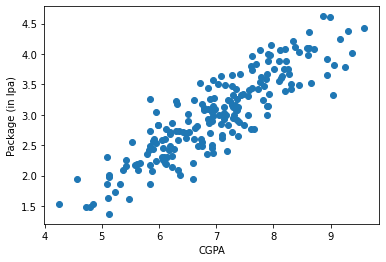

In [3]:
plt.scatter(df["cgpa"], df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package (in lpa)")
plt.show()

In [8]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

X_train.shape, y_train.shape

((160, 1), (160,))

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

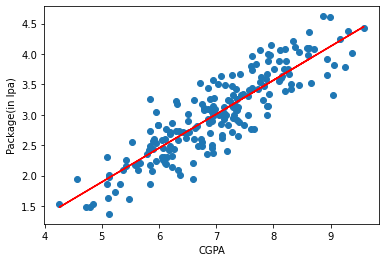

In [10]:
plt.scatter(df["cgpa"], df["package"])
plt.plot(X_train, lr.predict(X_train), color = "red")
plt.xlabel("CGPA")
plt.ylabel("Package(in lpa)")
plt.show()

In [16]:
y_pred = lr.predict(X_test)

print(f"MAS:      {mean_absolute_error(y_test, y_pred)}")
print(f"MSE:      {mean_squared_error(y_test, y_pred)}")
print(f"RMSE:     {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

# Adjasted R2 Score
r2 = r2_score(y_test, y_pred)
r2_adj = 1 - ((1 - r2) * (X_test.shape[0] - 1))/(X_test.shape[0] - 1 - X_test.shape[1])
print(f"R2 Adj:   {r2_adj}")

MAS:      0.2884710931878175
MSE:      0.12129235313495527
RMSE:     0.34827051717731616
R2 Score: 0.780730147510384
R2 Adj:   0.7749598882343415


In [17]:
# Adjusted r2 score helps for irrelivant columns
new_df1 = df.copy()
new_df1["random_feature"] = np.random.random(200)

new_df1 = new_df1[["cgpa", "random_feature", "package"]]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.746647,3.26
1,5.12,0.185046,1.98
2,7.82,0.062345,3.25
3,7.42,0.003277,3.67
4,6.94,0.136858,3.57


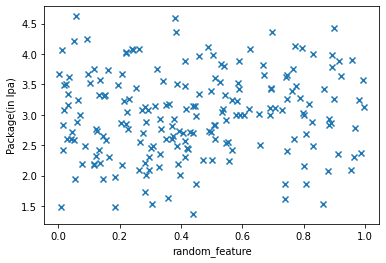

In [18]:
plt.scatter(new_df1["random_feature"], new_df1["package"], marker = "x")
plt.xlabel("random_feature")
plt.ylabel("Package(in lpa)")
plt.show()

In [19]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.7817616112147638


In [21]:
r2 = r2_score(y_test, y_pred)
r2_adj = 1 - ((1 - r2) * (X_test.shape[0] - 1))/(X_test.shape[0] - 1 - X_test.shape[1])
print(f"R2 Adj:   {r2_adj}")

R2 Adj:   0.7699649415506971


In [22]:
# new df which has valid impact on package
new_df2 = df.copy()
new_df2["iq"] = new_df2["package"] + (np.random.randint(-12, 12, 200)/10)
new_df2 = new_df2[["cgpa", "iq", "package"]]
new_df2.sample(5)

,cgpa,iq,package
60,5.61,1.89,2.19
34,7.34,3.62,3.42
78,6.59,2.61,2.21
130,6.68,1.49,2.49
148,7.57,4.50,3.40


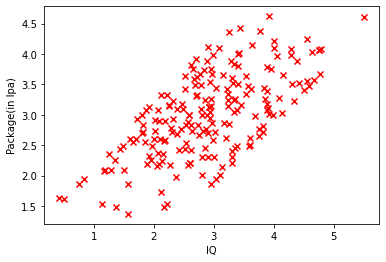

In [23]:
plt.scatter(new_df2["iq"], new_df2["package"], marker = "x", color = "r")
plt.xlabel("IQ")
plt.ylabel("Package(in lpa)")
plt.show()

In [24]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

lr = LinearRegression()
lr.fit(X_train, y_train) 

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2}")
r2_adj = 1 - ((1 - r2) * (X_test.shape[0] - 1))/(X_test.shape[0] - 1 - X_test.shape[1])
print(f"R2 Adj:   {r2_adj}")

R2 score: 0.7949365559688715
R2 Adj:   0.7838520454807023


# Gradient Descent

Gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent.

**Blogs:**
- https://www.analyticsvidhya.com/blog/2021/05/gradient-descent-from-scratch-complete-intuition/
- https://towardsdatascience.com/mathematical-intuition-behind-gradient-descent-f1b959a59e6d
- https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672 with animation

## Step-By-Step

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression

import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [2]:
X, y = make_regression(n_samples = 4, n_features = 1, n_informative = 1, n_targets = 1, noise = 80, random_state = 13)

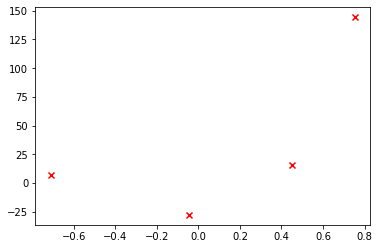

In [4]:
plt.scatter(X, y, marker = "x", color = "r")
plt.show()

In [6]:
# Lets apply OLS
reg = LinearRegression()
reg.fit(X, y)

reg.coef_

array([78.35063668])

In [7]:
reg.intercept_

26.15963284313262

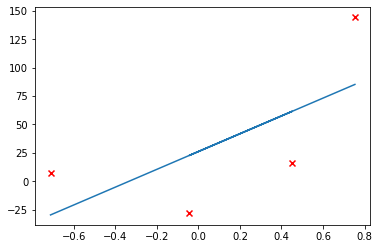

In [11]:
plt.scatter(X, y, color = "red", marker = "x")
plt.plot(X, reg.predict(X))
plt.show()

In [12]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0).reshape(4)

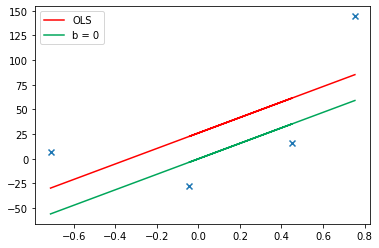

In [14]:
plt.scatter(X, y, marker = "x")
plt.plot(X, reg.predict(X), color = "red", label = "OLS")
plt.plot(X, y_pred, color = "#00a65a", label = "b = 0")
plt.legend()
plt.show()

In [15]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-209.27763408209216

In [16]:
# Let's take learning rate = 0.1
lr = 0.1

step_size = loss_slope * lr
step_size

-20.927763408209216

In [17]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

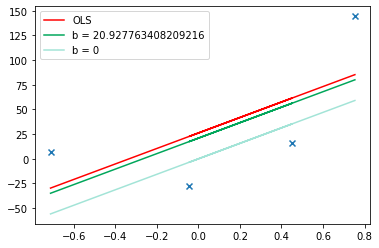

In [18]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X, y, marker = "x")
plt.plot(X, reg.predict(X), color = 'r', label = "OLS")
plt.plot(X, y_pred1, color = "#00a65a", label = "b = {}".format(b))
plt.plot(X, y_pred, color = "#A3E4D7", label = "b = 0")
plt.legend()
plt.show()

In [19]:
# iteration 2
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-41.85552681641843

In [20]:
step_size = loss_slope * lr
step_size

-4.185552681641844

In [21]:
b = b - step_size
b

25.11331608985106

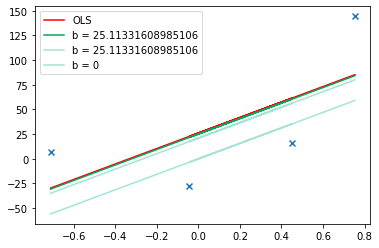

In [22]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X, y, marker = "x")
plt.plot(X, reg.predict(X), color = 'r', label = "OLS")
plt.plot(X, y_pred2, color = "#00a65a", label = "b = {}".format(b))
plt.plot(X, y_pred1, color = "#A3E4D7", label = "b = {}".format(b))
plt.plot(X, y_pred, color = "#A3E4D7", label = "b = 0")
plt.legend()
plt.show()

In [23]:
# iteration 3
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-8.371105363283675

In [24]:
step_size = loss_slope * lr
step_size

-0.8371105363283675

In [25]:
b = b - step_size
b

25.95042662617943

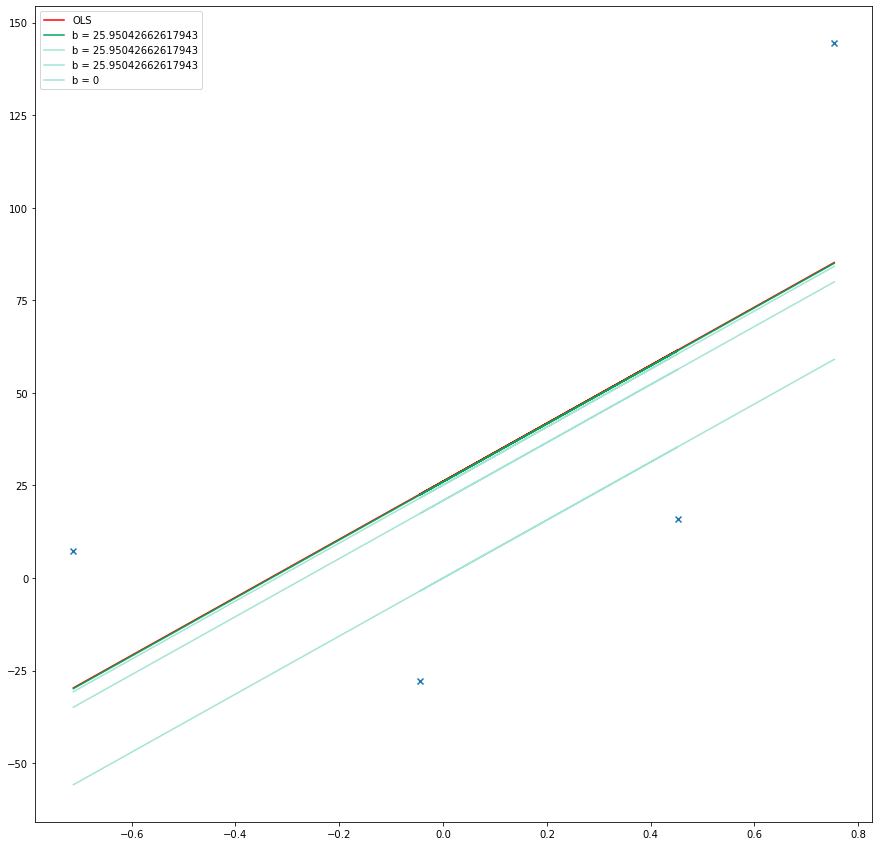

In [27]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize = (15, 15))
plt.scatter(X, y, marker = "x")
plt.plot(X, reg.predict(X), color = 'red', label = "OLS")
plt.plot(X, y_pred3, color = "#00a65a", label = f"b = {b}")
plt.plot(X, y_pred2, color = "#A3E4D7", label = "b = {}".format(b))
plt.plot(X, y_pred1, color = "#A3E4D7", label = "b = {}".format(b))
plt.plot(X, y_pred, color = "#A3E4D7", label = "b = 0")
plt.legend()
plt.show()

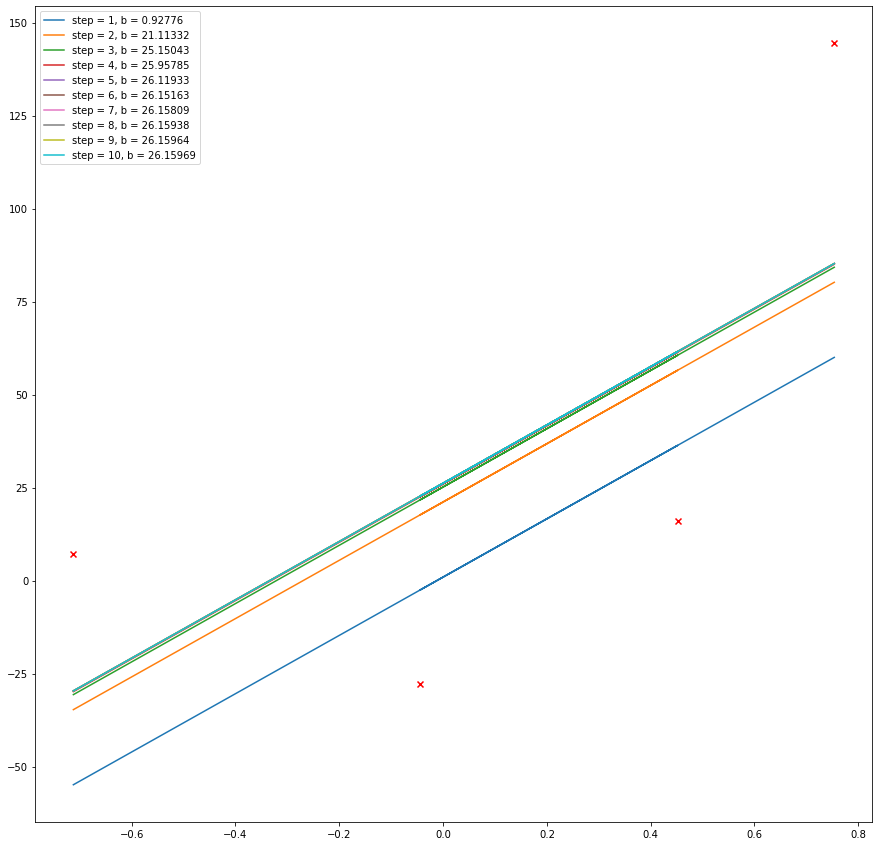

In [30]:
# now time to do in loop
b = -100
m = 78.35
lr = 0.1

epochs = 10

plt.figure(figsize = (15, 15))

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    b = b - (lr * loss_slope)
    
    y_pred = m * X + b
    
    plt.plot(X, y_pred, label = f"step = {i + 1}, b = {round(b, 5)}")
    
plt.scatter(X, y, marker = "x", color = "red")
plt.legend()
plt.show()

In [33]:
# Now time to create a class (with both b & m)
m = 26.16

class GDRegressor:
    def __init__(self, learning_rate = 0.01, epochs = 10):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        # calculate the b using Gradient Descent
        for epoch in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            
        # print(self.m, self.b)
    
    def predict(self, X):
        return self.m * X + self.b  

In [35]:
gd = GDRegressor(learning_rate = 0.001, epochs = 100)

gd.fit(X, y)

-36.07094309147618


### Animation View of GD

In [1]:
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

<IPython.core.display.Javascript object>


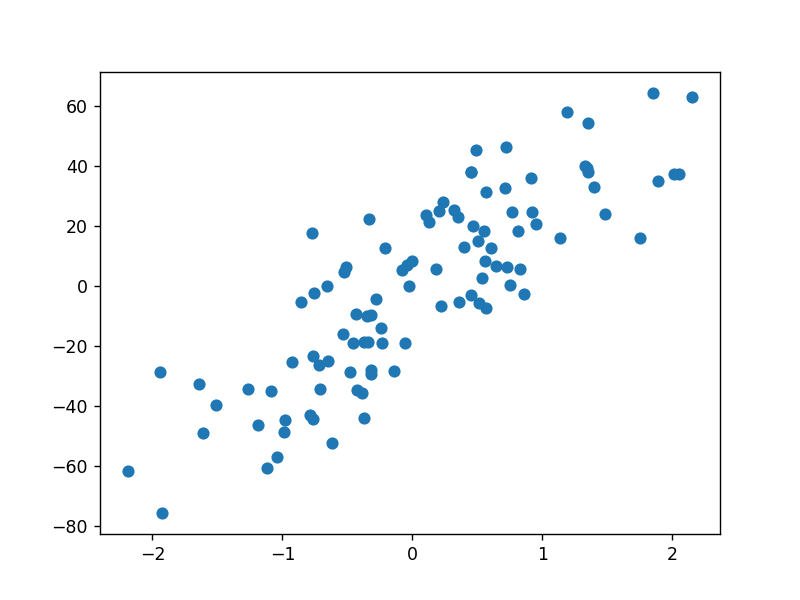

In [3]:
plt.scatter(X,y)
plt.show()

In [9]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


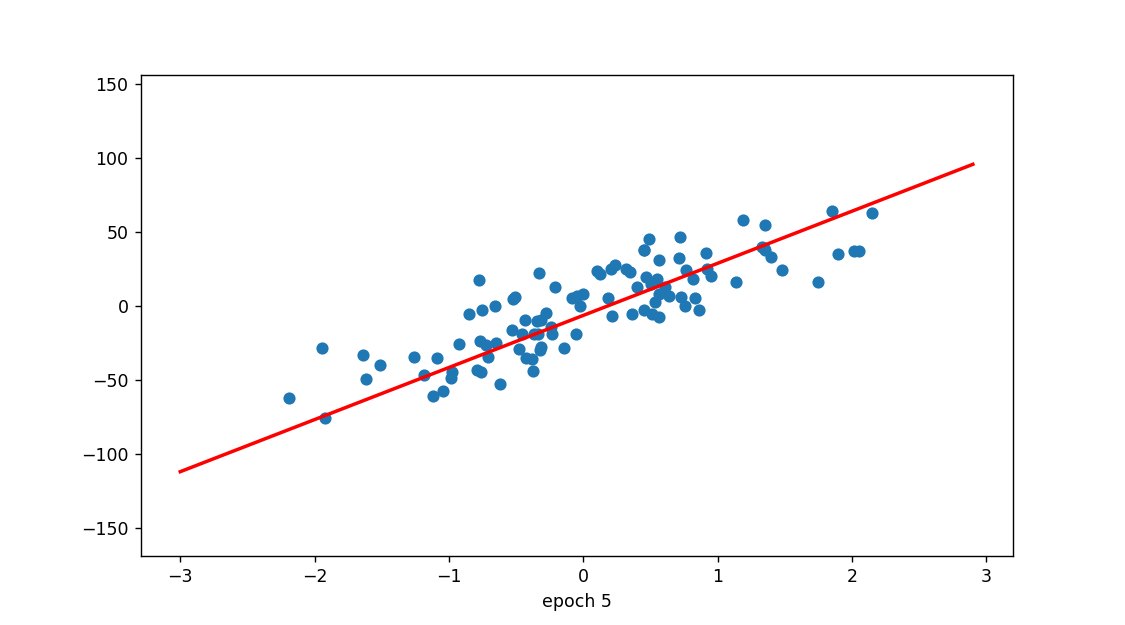

In [6]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * all_m[i] + all_b[i])
    ax.set_xlabel(label)
#     return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

## Batch Gradient Descent (n-dim)

In [2]:
import numpy as np

class BGDRegressor:
    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        # initialize the coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(X.shape[1])
        
        for epoch in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X, self.coef_) + self.intercept_
            intercept_derivative = -2 * np.mean(y - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_derivative)
            
            coef_derivative = -2 * np.dot((y - y_hat), X)/X.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_derivative)
    
    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

## Stochastic Gradient Descent (n-dim)

In [ ]:
class SGDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                # choose random row/record and predict
                idx = np.random.randint(0,X_train.shape[0])
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                # upodate the intercept
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                # update the coefficients
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
# learning schedules: change the learning rate according to the epochs that helps to reduce the flactuate
# to find the minima
t0, t1 = 56, 50

def learning_rate(t):
    return t0/(t + t1)

for i in range(epochs):
    for j in range(X.shape[0]):
        lr = learning_rate(i * X.shape[0] + j)

## Mini-Batch Gradient Descent (n-dim)

In [4]:
import numpy as np
import random

class MBGDRegressor:
    def __init__(self, batch_size, learning_rate = 0.01, epochs = 100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = int(batch_size)
    
    def fit(self, X, y):
        # initialize the coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(X.shape[1])
        
        for epoch in range(self.epochs):
            for j in range(int(X.shape[0]/self.batch_size)):
                idx = random.sample(range(X.shape[0]), self.batch_size)
                
                # update all the coef and the intercept
                y_hat = np.dot(X[idx], self.coef_) + self.intercept_
                
                intercept_derivative = -2 * np.mean(y[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_derivative)

                coef_derivative = -2 * np.dot((y - y_hat), X)/X.shape[0]
                self.coef_ = self.coef_ - (self.lr * coef_derivative)
    
    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_
    
# Here we can also use learning schedule

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(learning_rate = "constant", eta = 0.2)

batch_size = 35

for i in range(100):
    idx = random.sample(range(X_train.shape[0]), batch_size)
    sgd.partial_fit(X_train[idx], y_train[idx])
    
print(sdg.coef_)
print(sgd.intercept_)

y_pred = sgd.predict(X_test)
print(r2_score(y_test, y_pred))